# **Aim - Developing A Neural Network That Can Read Handwriting**

# **Neural Network That Can Read Handwriting**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

In [4]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [5]:
%cd "/gdrive/My Drive/Practice/Grow_More"

/gdrive/My Drive/Practice/Grow_More


In [6]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
from keras.utils import np_utils 

Y_train=np_utils.to_categorical(y_train)      # 1-hot encoding
Y_test=np_utils.to_categorical(y_test) 

In [9]:
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


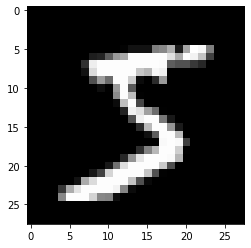

In [10]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

Here.. we are working with black and white image..so channel ie dept is 1.... so reshape this to dimention 28,28,1 to denote as black and white image<br>
if it is colored image channel will be 3... R G B... here dimenstion will be 28 28 3


In [11]:
x_train=X_train.reshape(-1,28,28,1)
x_test=X_test.reshape(-1,28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
x_train=x_train[:3600]
x_test=x_test[:900]

Y_train=Y_train[:3600]
Y_test=Y_test[:900]

print(x_train.shape,Y_train.shape)
print(x_test.shape,Y_test.shape)

(3600, 28, 28, 1) (3600, 10)
(900, 28, 28, 1) (900, 10)


In [13]:
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout       
#Dense layer are fully connected layers where each nueron receives input from all neurons in previous layers
#Activation function applied on dense layer to activate non linear function
#Flatten is used to flatten matrix into an 1d array
#conv2D-To apply Convolutional layer
#MaxPool2D- to reduce size of image if no of weights increase too much
#Dropout-Used for reguralization of data
from keras.models import Sequential
#Sequential is simple layer where previous layer is fed into next layer |->|->|->|.....

In [14]:
model=Sequential()

#Dimentions- (28,28,1)
model.add(Conv2D(32, (3, 3),input_shape=(28,28,1)))   #32 filters, each filter 3x3
model.add(Activation('relu'))
#After conv layer- (26,26,32)

model.add(Conv2D(64, (3, 3)) )  #64 filters, each filter 3x3
model.add(Activation('relu'))
#After 2nd conv layer- (24,24,64)

model.add(MaxPooling2D(pool_size=(2,2)))
#reduces dimensions of image- (12,12,64)
#4 pixelels merged into 1, channels remains the same

model.add(Conv2D(16, (3, 3)) )  #16 filters, each filter 3x3
model.add(Activation('relu'))
#After 3nd conv layer- (10,10,16)

model.add(Flatten())   #After flattening.. total features will be 28*28=784
# (1600, )

model.add(Dropout(0.25))  #25% of random weights will be reduced to zero
#prevents over fitting

# model.add(Dense(100))
# model.add(Activation('relu'))
                                 #--> hidden layers optional
# model.add(Dense(100))         
# model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        9232      
                                                        

1st conv layer- 3x3=9 weights+1 intercept term, and 32 filters..so 10*32= 320 params  <br>
2nd conv layer- (3x3=9 weights)*32channels for each filter=288*64 filters+64intercepts=18496  <br>
3rd conv layer- same calc as 2nd  <br>
Dense layer- 1600 features+1 intercept*10 neurons=16010

In [15]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.fit(x_train,Y_train, 
         batch_size=16,    #batch_size-how many training exaples to use before updating weights
         #nb_epoch=20,
         epochs=12,
         verbose=1,      #verbose- determines how detailed the output will be
         validation_data=(x_test,Y_test))

Epoch 1/12
225/225 [==============================] - 13s 54ms/step - loss: 1.1672 - accuracy: 0.6808 - val_loss: 0.3453 - val_accuracy: 0.8922
Epoch 2/12
225/225 [==============================] - 16s 69ms/step - loss: 0.3277 - accuracy: 0.9036 - val_loss: 0.1993 - val_accuracy: 0.9367
Epoch 3/12
225/225 [==============================] - 16s 70ms/step - loss: 0.1726 - accuracy: 0.9494 - val_loss: 0.1528 - val_accuracy: 0.9500
Epoch 4/12
225/225 [==============================] - 20s 90ms/step - loss: 0.1249 - accuracy: 0.9581 - val_loss: 0.1746 - val_accuracy: 0.9367
Epoch 5/12
225/225 [==============================] - 17s 75ms/step - loss: 0.0924 - accuracy: 0.9692 - val_loss: 0.1491 - val_accuracy: 0.9500
Epoch 6/12
225/225 [==============================] - 12s 56ms/step - loss: 0.1005 - accuracy: 0.9692 - val_loss: 0.1594 - val_accuracy: 0.9556
Epoch 7/12
225/225 [==============================] - 10s 46ms/step - loss: 0.0739 - accuracy: 0.9789 - val_loss: 0.1227 - val_accuracy:

In [18]:
loss,accuracy = model.evaluate(x_test,Y_test,verbose=0)
print(f'Accuracy:{accuracy*100}')

Accuracy:94.33333277702332


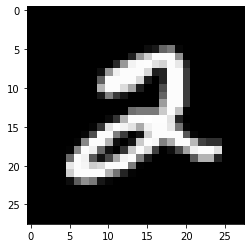

In [35]:
image= x_train[5]
## lets display the image which we want to predict
plt.imshow(np.squeeze(image),cmap="gray")
plt.show()

In [22]:
from numpy import argmax

In [44]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p= model.predict([image])
print("predicted:{}".format(argmax(p)))

predicted:2


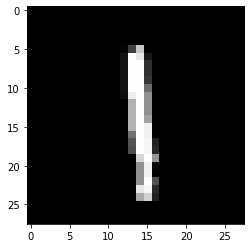

In [45]:
image= x_train[8]
## lets display the image which we want to predict
plt.imshow(np.squeeze(image),cmap="gray")
plt.show()

In [46]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p= model.predict([image])
print("predicted:{}".format(argmax(p)))

predicted:1
